In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

RANDOM_STATE = 42

In [4]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")

In [5]:
y_train = y_train.drop(columns=["id"])
X_train = X_train.drop(columns=["id"])
X_test = X_test.drop(columns=["id"])

In [7]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

vif = calc_vif(X_train)
vif= vif.sort_values("VIF")
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
28,num_deprecated_modules,1.012563
74,delta_num_deprecated_modules,1.017382
21,num_authorized_key,1.020325
32,num_file_exists,1.022900
67,delta_num_authorized_key,1.031967
...,...,...
12,deletions,inf
8,code_churn_count,inf
0,additions,inf
47,num_math_operations,NaN


In [10]:
vif[vif['VIF']<10]

,variables,VIF
28,num_deprecated_modules,1.012563
74,delta_num_deprecated_modules,1.017382
21,num_authorized_key,1.020325
32,num_file_exists,1.022900
67,delta_num_authorized_key,1.031967
...,...,...
11,contributors_count,6.546468
4,avg_task_size,7.015963
25,num_conditions,7.177816
98,delta_num_prompts,9.126744


This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

In [11]:
vif_cols = list(vif[vif['VIF']<10]["variables"].unique())

In [12]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_vif = X_train_scaled[vif_cols]
X_test_vif = X_test_scaled[vif_cols]

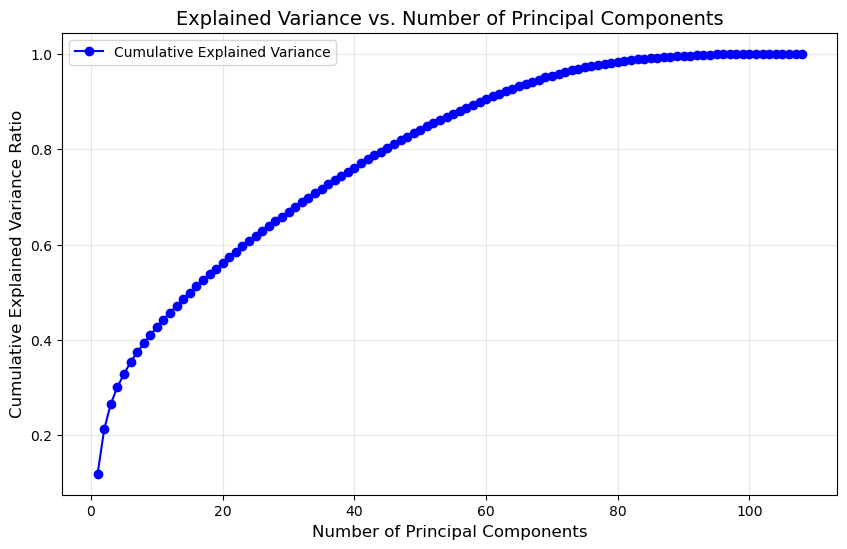

In [13]:
explained_var = []
for n in range(1, 109):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    explained_var.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 109), explained_var, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance vs. Number of Principal Components', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [10]:
pca = PCA(n_components=60)
pca_60 = pca.fit(X_train_scaled)
X_train_pca_60 = pca_60.transform(X_train_scaled)
X_train_pca_60 = pd.DataFrame(X_train_pca_60)
print(f"Explained variance by first 60 components: {sum(pca.explained_variance_ratio_)}")

X_test_pca_60 = pca_60.transform(X_test)
X_test_pca_60 = pd.DataFrame(X_test_pca_60)

Explained variance by first 60 components: 0.9049357326984675


In [11]:
pca = PCA(n_components=85)
pca_85 = pca.fit(X_train_scaled)
X_train_pca_85 = pca_85.transform(X_train_scaled)
X_train_pca_85 = pd.DataFrame(X_train_pca_85)
print(f"Explained variance by first 85 components: {sum(pca.explained_variance_ratio_)}")

X_test_pca_85 = pca_85.transform(X_test)
X_test_pca_85 = pd.DataFrame(X_test_pca_85)

Explained variance by first 85 components: 0.9903506165060423


In [12]:
y_train.to_csv('pc_y_train.csv', index=False)

X_train_scaled.to_csv('pc_X_train.csv', index=False)
X_test_scaled.to_csv('pc_X_test.csv', index=False)

X_train_vif.to_csv('pc_X_train_vif.csv', index=False)
X_test_vif.to_csv('pc_X_test_vif.csv', index=False)

X_train_pca_60.to_csv('pc_X_train_pca_60.csv', index=False)
X_test_pca_60.to_csv('pc_X_test_pca_60.csv', index=False)

X_train_pca_85.to_csv('pc_X_train_pca_85.csv', index=False)
X_test_pca_85.to_csv('pc_X_test_pca_85.csv', index=False)